# Hands-On scikit-learn Tutorial: Getting Started with Machine Learning

![Python Logo](https://www.analyticsvidhya.com/wp-content/uploads/2015/01/scikit-learn-logo.png)

## Introduction

Scikit-learn, also known as sklearn, is a popular and widely-used open-source machine learning library in Python. This library provides a robust set of tools for various machine learning tasks, including supervised and unsupervised learning which are a central focus of this tutorial. Scikit-learn is built on top of other scientific computing libraries like NumPy and SciPy, making it a powerful and efficient choice for data scientists and machine learning practitioners.

The primary goal of scikit-learn is to simplify the process of applying machine learning algorithms to real-world data. It offers a user-friendly interface for working with data, creating machine learning models, and evaluating their performance. The library supports a broad range of algorithms, from traditional statistical methods to cutting-edge machine learning techniques, making it suitable for both beginners and experienced researchers.

The purpose of this tutorial is to provide a high-level overview of supervised and unsupervised learning and describe how to utilize scikit-learn to build machine learning models tailored for these specific tasks. By the end of this tutorial, you will have a solid understanding of the key concepts, methods, and techniques required to effectively leverage scikit-learn for creating powerful and accurate machine learning models in both supervised and unsupervised settings. 

## Supervised Learning

Supervised learning is a machine learning approach where an algorithm learns from labeled training data to make accurate predictions or decisions. In this setting, a dataset consists of input-output pairs, where each input is associated with a corresponding desired output. The goal is to learn a model (or function) that maps inputs to outputs (or targets) from the training set so that the model can then accurately predict outputs for new, unseen inputs.


Based on this description there are 3 main ingredients to supervised learning: (1) inputs, (2) targets, and (3) model. Let's consider an example of learning a model that predicts house prices.


1. **Inputs**

First, we are given a set of _inputs_ which we denote as $X=\{x^{(1)},\ldots, x^{(n)}\}$. An input $x^{(i)}$ is a vector where each entry is a feature that describes that data point. Using the housing price prediction example, some relevant features for a house are the number of bedrooms and square footage. If we have a new house with 4 bedrooms and 2500 square footage, then the feature vector for this house is $x^{(i)}=$ (4, 2500).


2. **Targets**

Second, we are given a set of _targets_ denoted as $y=\{y^{(1)},\ldots, y^{(n)}\}$ such that each target $y^{(i)}$ is the value that the model is trying to predict or estimate based on the input $x^{(i)}$. Targets represent the values we are aiming to understand, predict, or classify using the trained machine learning model. Using the housing price prediction example, the label would be the actual price of the house corresponding to the input data. For example, suppose that our new house with 3 bedrooms and 1800 square footage is sold for $\$$500,000, then the target would be $y^{(i)}=500,000$.

3. **Model**

Lastly, our objective is to train a _model_ on a dataset that contains examples of inputs along with corresponding desired label. The model learns from these examples by identifying underlying relationships and adjusting its internal parameters to optimize its performance. In this example, our goal is to learn some function $f$ such that $f(x^{(i)})\approx y^{(i)}$, then use this function to predict the value of a house that is about to be listed. 

### Let's Explore a Real Dataset!

The California Housing Prices dataset is a well-known and frequently used dataset in the field of machine learning and housing market analysis. It provides information about housing characteristics and pricing across various regions in California, making it valuable for regression and predictive modeling tasks. The California Housing Prices dataset contains features that describe different aspects of housing neighborhoods in California, such as median income, average housing occupancy, median house age, and more. The target variable is the median house value for California districts. Researchers and data analysts commonly use the California Housing Prices dataset to explore and analyze the relationships between housing attributes and prices.

**Key Information**:

Number of training examples: 20,640

Target: Median house value

Number of Features: 8 numerical features

Feature Information:
        - MedInc:        median income in block group
        
        - HouseAge:      median house age in block group
        
        - AveRooms:      average number of rooms per household
        
        - AveBedrms:     average number of bedrooms per household
        
        - Population:    block group population
        
        - AveOccup:      average number of household members
        
        - Latitude:      block group latitude
        
        - Longitude:     block group longitude


#### Let's load the data!


In [11]:
from sklearn.datasets import fetch_california_housing

housing_dataset = fetch_california_housing(as_frame=True)
housing_dataset.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Now let's visualize the data!

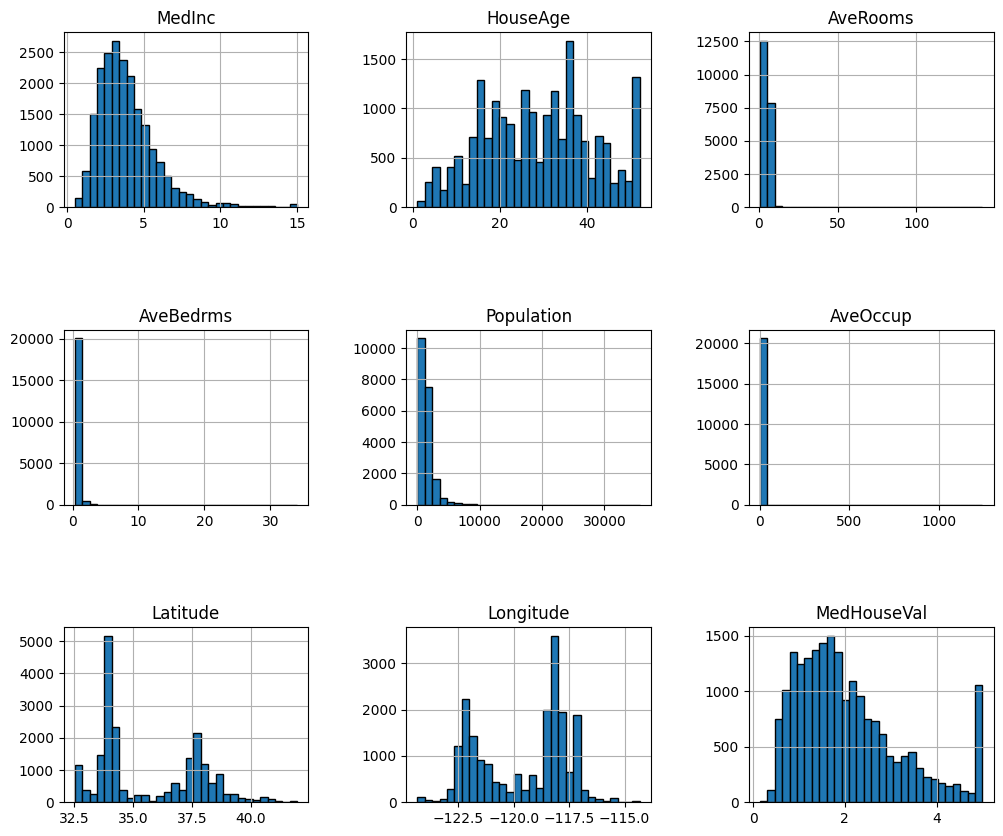

In [13]:
import matplotlib.pyplot as plt

housing_dataset.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

#### Are there Patterns in this Data?

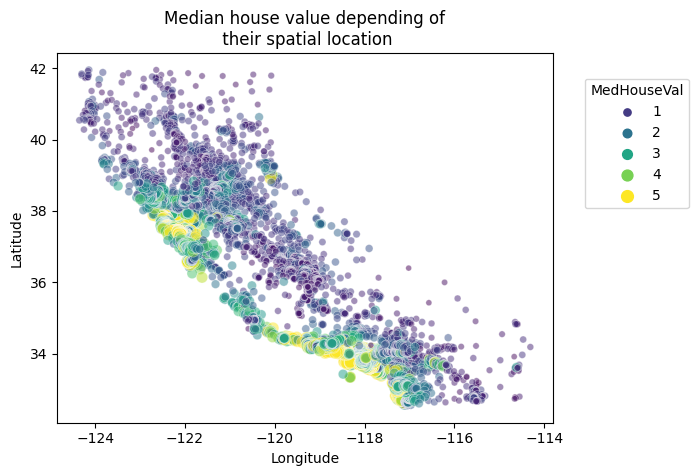

In [16]:
import seaborn as sns


sns.scatterplot(
    data=housing_dataset.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

#### Exercise: Is any single feature predictive of the target MedHouseVal?

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  # This is added back by InteractiveShellApp.init_path()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


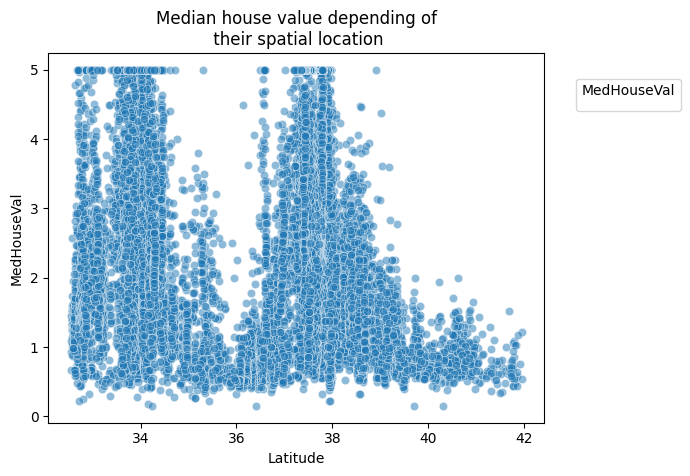

In [26]:
import seaborn as sns

feature = "Latitude"
target = "MedHouseVal"

sns.scatterplot(
    data=housing_dataset.frame,
    x=feature,
    y=target,
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

### Simple Model: Linear Regression

Linear regression is a method to find a straight line that best fits data points. It helps predict a target value based on one or more input variables. The goal is to minimize the difference between predicted and actual values. This technique is used for tasks like predicting prices, understanding relationships, and identifying trends in data. We're going to start by splitting the data into train and test sets. The train set is the portion of the dataset used to teach a model by showing it input data and expected outcomes. The test set is a separate part of the data used to evaluate the model's performance by comparing its predictions with the actual outcomes it hasn't seen before.

![Python Logo](https://i0.wp.com/thaddeus-segura.com/wp-content/uploads/2020/09/3.1.1.1.1-Linear-Regression.png?resize=1024%2C498&ssl=1)

In [31]:
from sklearn.model_selection import train_test_split

X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Number of training examples:", len(X_train))
print("Number of testing examples:", len(X_train))

Number of training examples: 16512
Number of testing examples: 16512


#### 1. Choose a class of model

In Scikit-Learn, every class of model is represented by a Python class.
So, for example, if we would like to compute a simple `LinearRegression` model, we can import the linear regression class:

In [34]:
from sklearn.linear_model import LinearRegression


Note that other more general linear regression models exist as well; you can read more about them in the [`sklearn.linear_model` module documentation](http://Scikit-Learn.org/stable/modules/linear_model.html).

#### 2. Choose model hyperparameters

An important point is that *a class of model is not the same as an instance of a model*.

Once we have decided on our model class, there are still some options open to us.
Depending on the model class we are working with, we might need to answer one or more questions like the following:

- Would we like to fit for the offset (i.e., *y*-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of regularization would we like to use in our model?
- How many model components would we like to use?

These are examples of the important choices that must be made *once the model class is selected*.
These choices are often represented as *hyperparameters*, or parameters that must be set before the model is fit to data.
In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.
We will explore how you can quantitatively choose hyperparameters in [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb).

For our linear regression example, we can instantiate the `LinearRegression` class and specify that we would like to fit the intercept using the `fit_intercept` hyperparameter:

In [35]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

Keep in mind that when the model is instantiated, the only action is storing the hyperparameter values.
In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between *choice of model* and *application of model to data*.

#### 4. Fit the model to the data

Now it is time to apply our model to the data.
This can be done with the `fit` method of the model:

In [36]:
model.fit(X_train, y_train)


LinearRegression()

This fit command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore. In Scikit-Learn, by convention all model parameters that were learned during the fit process have trailing underscores; for example in this linear model, we have the following:

In [37]:
model.coef_

array([ 4.31302548e-01,  9.75899997e-03, -9.45938775e-02,  5.84962843e-01,
       -4.73192159e-06, -4.66746908e-03, -4.27724334e-01, -4.39839726e-01])

In [38]:
model.intercept_

-37.33715746902742

These two parameters represent the slope and intercept of the simple linear fit
to the data.
Comparing the results to the data definition, we see that they are close to the values used to generate the data: a slope of 2 and intercept of –1.

One question that frequently comes up regards the uncertainty in such internal model parameters.
In general, Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves: interpreting model parameters is much more a *statistical modeling* question than a *machine learning* question.
Machine learning instead focuses on what the model *predicts*.
If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the [`statsmodels` Python package](http://statsmodels.sourceforge.net/).

#### 5. Predict labels for unknown data
Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set. In Scikit-Learn, this can be done using the predict method. For the sake of this example, our "new data" will be a grid of x values, and we will ask what y values the model predicts:

In [44]:
y_pred = model.predict(X_test)
y_pred

array([1.86014132, 2.39297655, 1.79741403, ..., 1.13549375, 1.85598634,
       3.4736388 ])

### Evaluating the Performance of a Model

add high level description, maybe note that this can look very different depending on the task 

### Activity: Let's Tryout Some of these Methods with a New Dataset

- This is actually going to be an exercise

- One idea would to choose a data set that has multiple features and have the students trying fit a linear regression model only using one features at time. 

- The goal here would be to see what features give you the best evaluation results. 

- In addition, they can try tuning the hyperparameters to see how they affect the performance

- Discuss what are the shortcomings of this model? Some responses might be that we're only considering one feature at a time, this is a linear model so maybe a nonlinear model would be better.

## Unsupervised Learning

- Add high level description

- What are some concrete examples of models that you might use, maybe add a couple pics to keep it high level

- Introduce K means

### Simple Example: K-Means Clustering

- Introduce the notion of clustering
- Describe how K-Means works

#### Load and Visualize the Dataset

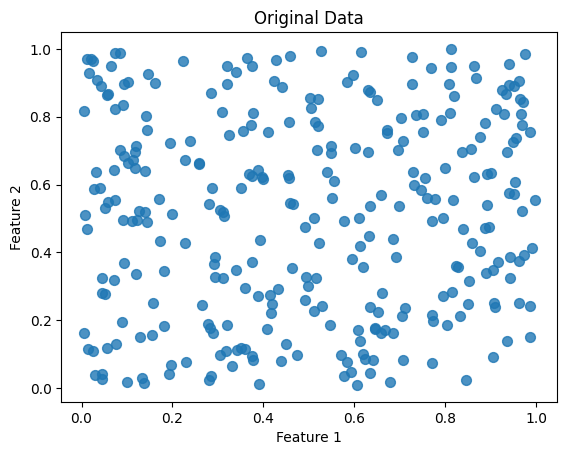

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(42)
n_samples = 300
X = np.random.rand(n_samples, 2)

plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.8)
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#### Fit the Model to the Dataset

- There's a lot of models to choose from https://scikit-learn.org/stable/unsupervised_learning.html
- Introduce kmeans

In [9]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

#### Visualize the Clustering 

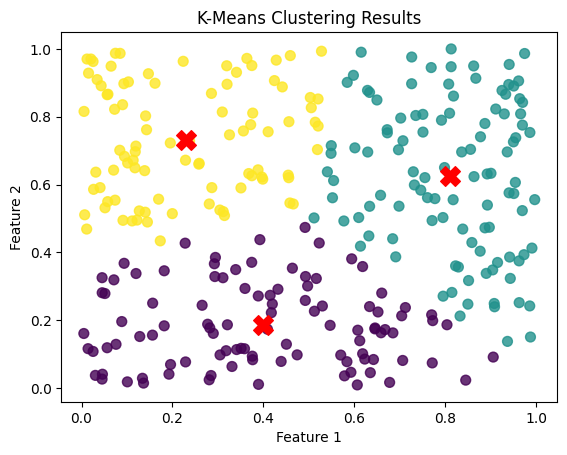

In [4]:
# Coordinates of cluster centers
centers = kmeans.cluster_centers_

# Cluster assignments for each data point
labels = kmeans.labels_

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', alpha=0.8)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
### Evaluating the Performance of the Model

In [6]:
new_data = np.array([[0.2, 0.8], [0.6, 0.2]])
predicted_labels = kmeans.predict(new_data)
print("Predicted labels for new data:", predicted_labels)

Predicted labels for new data: [2 0]


#### What are the Shortcomings of this Model?

### Activity: Let's Try A Different Model

Choose something from https://scikit-learn.org/stable/unsupervised_learning.html